# GIS Programming and Databases
## Assignment 1a

NAME: Grey Harris

ID: 97774899

Due: Monday, 7th of March 2022, 10:00pm

## Imports

In [1]:
import xarray as xr
import numpy as np # you can use numpy functions with xarray objects
import salem # this will help with plotting/projection 
import cartopy.crs as ccrs # an alternative way to handle plotting/projection yourself
import matplotlib.pyplot as plt

## Task 1

### 1a, What is the total size of the entire folder?

In [2]:
! pwd

/home/UOCNT/gha47/assignment1


In [3]:
! du -sh /mnt/data/MetService_WRF/

2.6T	/mnt/data/MetService_WRF/


Answer = Two point six Terrabytes

I used du not ls its nicer imo

### 1b, What is the total count of files present in that folder?

In [4]:
! ls /mnt/data/MetService_WRF/ | wc -l  # -1 is to not count the header

1251


Answer = 1251 files

## Task 2

### 2a, Find another variable from the dataset that is recorded at various height levels. What is it?

In [5]:
ds = xr.open_dataset("/mnt/data/MetService_WRF/RH_20200101000000.nc")

In [6]:
def plotter(data, title, x, y):
    data.plot()
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

In [7]:
def load_dataset(t, x="20200101000000"):
    path = "/mnt/data/MetService_WRF/"
    return xr.open_dataset(path + t + "_" + x + ".nc")

temp = load_dataset("T")
vel = load_dataset("V")
vel_u = load_dataset("U")
relHum = load_dataset("RH")
smois = load_dataset("SMOIS", x="20000101000000")
rain = load_dataset("RAINNC")

In [8]:
# RAINNC_20170701000000.nc
# RH_20000101000000.nc
# T_20000101000000.nc
# SMOIS_20000101000000.nc
# U_20000101000000.nc
# V_20000101000000.nc

# Rain, Relative Humidity, Temperature, SMOIS???, U???, Velocity
# not sure what Smois is, soil moisture? u is another velocity?

In [9]:
print(temp.T)

<xarray.DataArray 'T' (height: 10, time: 744, lat: 508, lon: 472)>
[1783933440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0


In [10]:
print(vel.V)

<xarray.DataArray 'V' (height: 10, time: 744, lat: 508, lon: 472)>
[1783933440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 10.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0


In [11]:
print(relHum.RH)

<xarray.DataArray 'RH' (height: 1, time: 744, lat: 508, lon: 472)>
[178393344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0


In [12]:
print(smois.SMOIS)

<xarray.DataArray 'SMOIS' (height: 8, time: 744, lat: 508, lon: 472)>
[1427146752 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 1.0 4.0 10.0 30.0 60.0 100.0 160.0 300.0


In [13]:
print(vel_u.U)

<xarray.DataArray 'U' (height: 10, time: 744, lat: 508, lon: 472)>
[1783933440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 10.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0


In [14]:
print(rain.RAINNC)

<xarray.DataArray 'RAINNC' (time: 744, lat: 508, lon: 472)>
[178393344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0


ANSWER:

Looks like there are two velocities, moisture, humidity and temp that all have height recordings.

Rain does not have height which makes sense

### 2b, Plot a time series of Relative Humidity for the month of January of any particular year from any location at the east coast of the South Island

In [15]:
# woodend a beach near my house
#lat, long = -43.327900, 172.710980
woodend_loc = load_dataset("RH").RH.sel(lat=-43,lon=172,method="nearest")
woodend_loc

<xarray.DataArray 'RH' (height: 1, time: 744)>
array([[33.38944 , 31.320387, 36.100044, ..., 56.790565, 48.62921 , 43.01931 ]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
    lat      float64 -43.0
    lon      float64 172.0
  * height   (height) float64 2.0

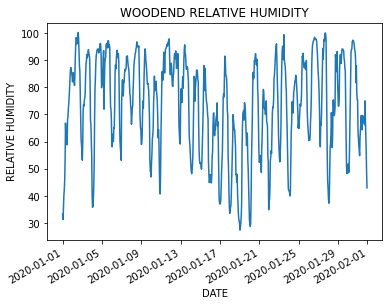

In [16]:
plotter(woodend_loc, "WOODEND RELATIVE HUMIDITY", "DATE", "RELATIVE HUMIDITY")

### 2c, Plot a time series of air temperature at 20m above ground level for the month of January for the same location you have chosen in (b)

In [17]:
# still woodend data to find the 20m index
woodend_temp = load_dataset("T").T.sel(lat=-43,lon=172,method="nearest")
woodend_temp.height

<xarray.DataArray 'height' (height: 10)>
array([  2.,  20.,  30.,  40.,  50.,  80., 100., 120., 150., 200.])
Coordinates:
    lat      float64 -43.0
    lon      float64 172.0
  * height   (height) float64 2.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0

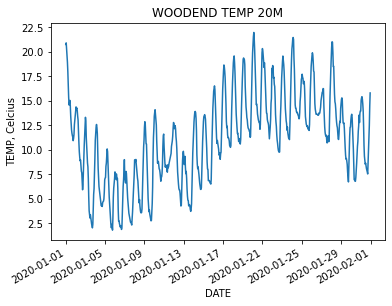

In [18]:
# still woodend data but only at 20m
index_20m = 1
woodend_temp_20m = load_dataset("T").T[index_20m, :, :, :].sel(lat=-43,lon=172,method="nearest")  - 273.15
woodend_temp_20m

plotter(woodend_temp_20m, "WOODEND TEMP 20M", "DATE", "TEMP, Celcius")

### 2d, Redo (b) and (c) over a 48 hour period of any two days of your choice

In [19]:
time = slice("2020-01-15","2020-01-16") #15th and 16th of jan 2020

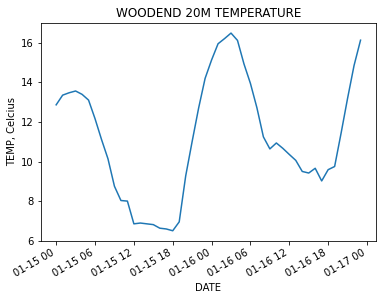

In [20]:
data = load_dataset("T").T[index_20m, :, :, :].sel(lat=-43,lon=172,method="nearest").sel(time=time) - 273.15
plotter(data, "WOODEND 20M TEMPERATURE", "DATE", "TEMP, Celcius")

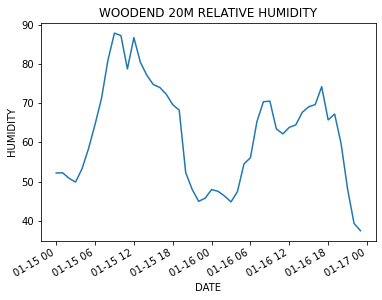

In [21]:
data = load_dataset("RH").RH.sel(lat=-43,lon=172,method="nearest").sel(time=time)
plotter(data, "WOODEND 20M RELATIVE HUMIDITY", "DATE", "HUMIDITY")

I tried to use [] slices before selects as I think it would be faster that way. Simple Matrix slice vs select which has logic being applied.

In [22]:
! pwd # I hope this was right palce to put it....

/home/UOCNT/gha47/assignment1
